# **Dataset Retrieval from Kaggle Using API**

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [2]:
!kaggle datasets download -d zzettrkalpakbal/full-filled-brain-stroke-dataset

  0% 0.00/52.1k [00:00<?, ?B/s]
100% 52.1k/52.1k [00:00<00:00, 63.8MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  full-filled-brain-stroke-dataset.zip
  inflating: full_data.csv           
  inflating: full_filled_stroke_data (1).csv  


In [4]:
#Importing Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import joblib

In [5]:
#Loading the Dataset
stroke_data=pd.read_csv('full_data.csv')

# **Exploratory Data Analysis (EDA)**

In [6]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
stroke_data.shape

(4981, 11)

In [8]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# **Data Cleaning**

In [10]:
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# **Visualizing categorical columns**

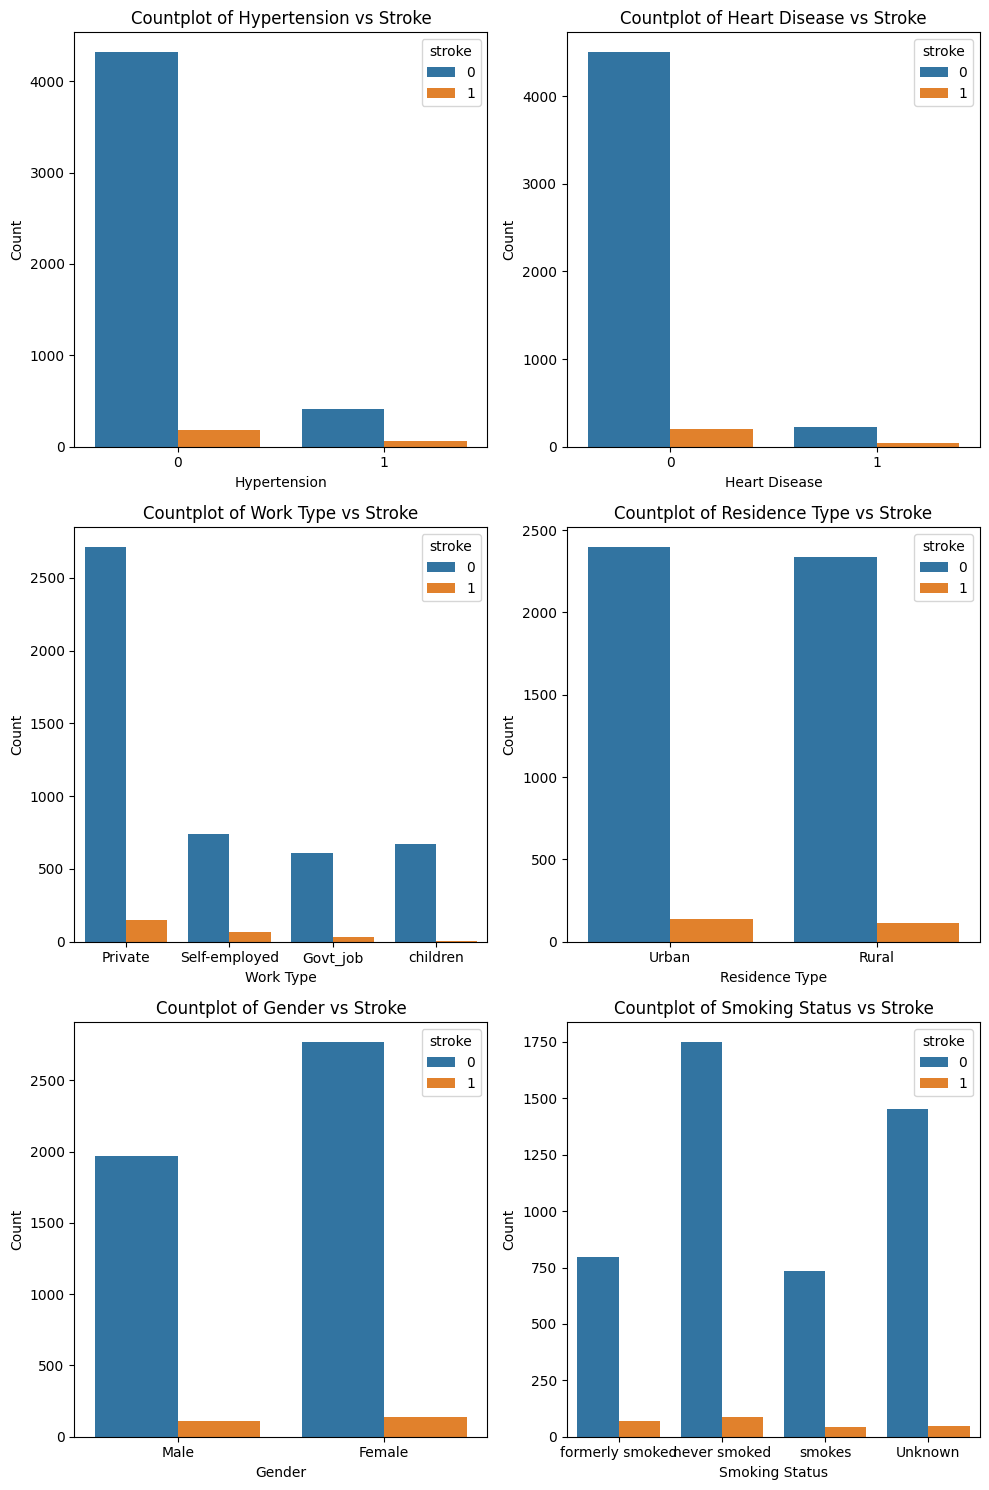

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
sns.countplot(x='hypertension', hue='stroke', data=stroke_data, ax=axes[0, 0])
axes[0, 0].set_title('Countplot of Hypertension vs Stroke')
axes[0, 0].set_xlabel('Hypertension')
axes[0, 0].set_ylabel('Count')

sns.countplot(x='heart_disease', hue='stroke', data=stroke_data, ax=axes[0, 1])
axes[0, 1].set_title('Countplot of Heart Disease vs Stroke')
axes[0, 1].set_xlabel('Heart Disease')
axes[0, 1].set_ylabel('Count')

sns.countplot(x='work_type', hue='stroke', data=stroke_data, ax=axes[1, 0])
axes[1, 0].set_title('Countplot of Work Type vs Stroke')
axes[1, 0].set_xlabel('Work Type')
axes[1, 0].set_ylabel('Count')

sns.countplot(x='Residence_type', hue='stroke', data=stroke_data, ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Residence Type vs Stroke')
axes[1, 1].set_xlabel('Residence Type')
axes[1, 1].set_ylabel('Count')

sns.countplot(x='gender', hue='stroke', data=stroke_data, ax=axes[2, 0])
axes[2, 0].set_title('Countplot of Gender vs Stroke')
axes[2, 0].set_xlabel('Gender')
axes[2, 0].set_ylabel('Count')

sns.countplot(x='smoking_status', hue='stroke', data=stroke_data, ax=axes[2, 1])
axes[2, 1].set_title('Countplot of Smoking Status vs Stroke')
axes[2, 1].set_xlabel('Smoking Status')
axes[2, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


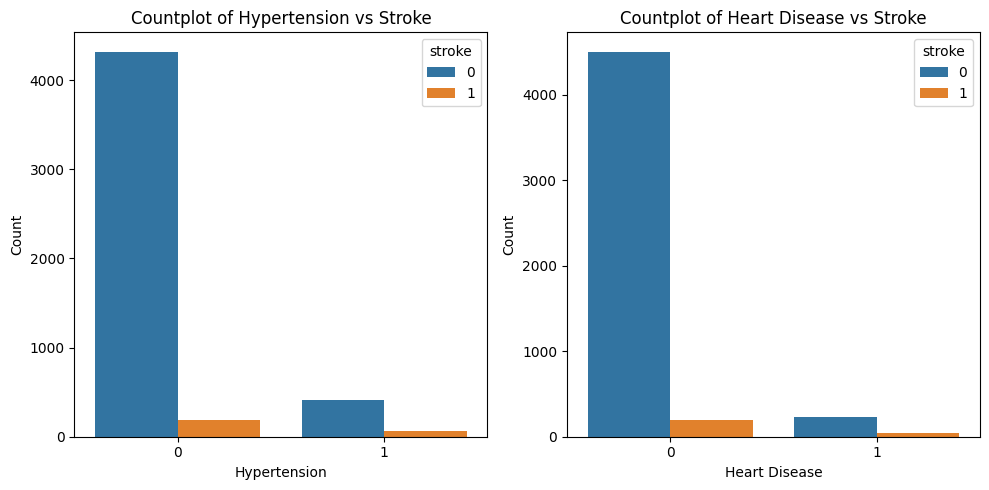

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(x='hypertension', hue='stroke', data=stroke_data, ax=axes[0])
axes[0].set_title('Countplot of Hypertension vs Stroke')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

sns.countplot(x='heart_disease', hue='stroke', data=stroke_data, ax=axes[1])
axes[1].set_title('Countplot of Heart Disease vs Stroke')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [13]:
stroke_data['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [14]:
stroke_data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

<Axes: >

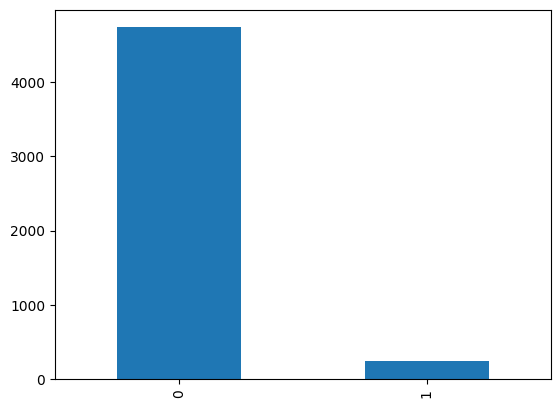

In [15]:
# Graphical representation of the value count distribution of the target attribute
stroke_data['stroke'].value_counts().plot(kind="bar")

<Axes: >

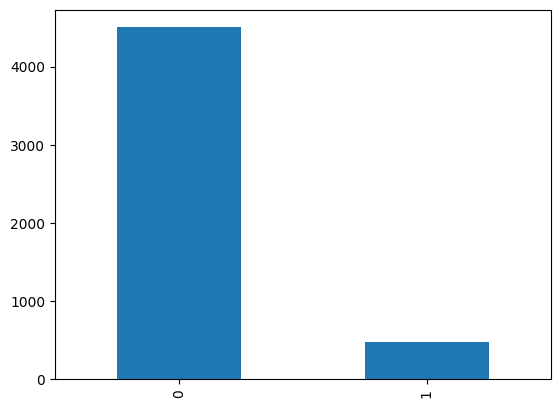

In [16]:
# Graphical representation of the value counts of the hypertension attribute
stroke_data['hypertension'].value_counts().plot(kind="bar")

In [17]:
# Value of count of work-type attribute
stroke_data['work_type'].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

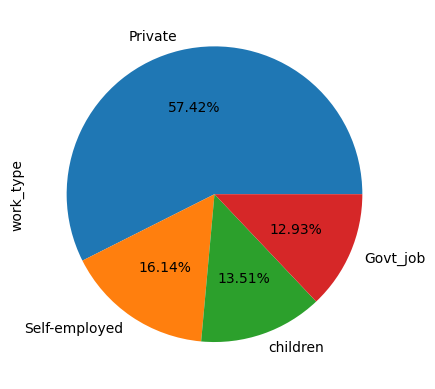

In [18]:
# Graphical representation of the value counts of the work-type attribute
stroke_data['work_type'].value_counts().plot(kind="pie",autopct='%.2f%%')

In [19]:
# Value of count of smoking status attribute
stroke_data['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

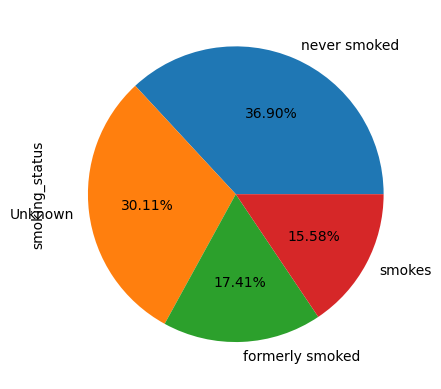

In [20]:
# Graphical representation of the value counts of the smoking status attribute
stroke_data['smoking_status'].value_counts().plot(kind="pie",autopct='%.2f%%')

<Axes: xlabel='gender', ylabel='avg_glucose_level'>

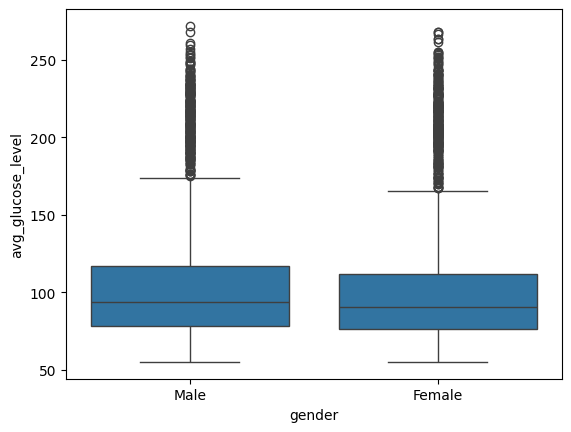

In [21]:
sns.boxplot(data = stroke_data,x='gender',y= 'avg_glucose_level')

<Axes: xlabel='stroke', ylabel='age'>

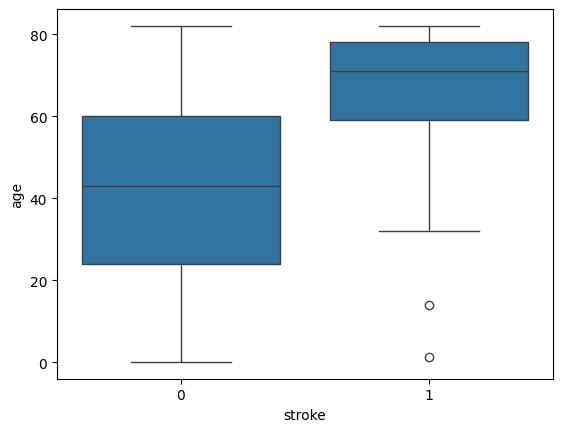

In [22]:
sns.boxplot(data = stroke_data,x='stroke',y='age')

# **Data Standardization**

In [23]:
#Encoding categorical variables into numerical values
cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
encoder = LabelEncoder()
for col in cols:
  stroke_data[col] = encoder.fit_transform(stroke_data[col])

<Axes: >

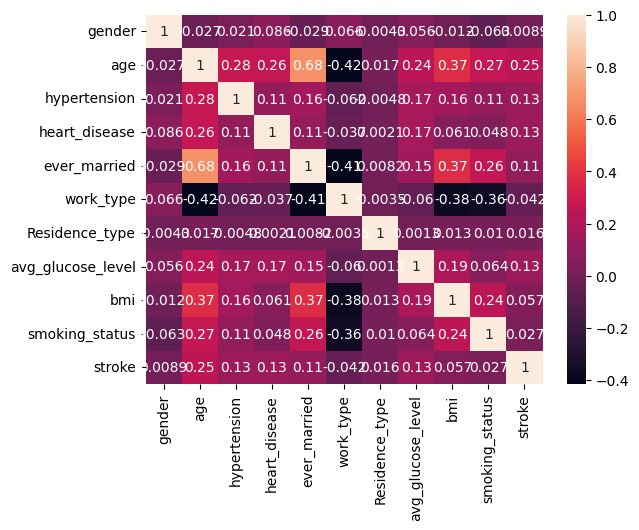

In [24]:
correlation_matrix = stroke_data.corr()
sns.heatmap(correlation_matrix,annot=True)

In [25]:
stroke_data = stroke_data.drop("gender",axis=1)
stroke_data = stroke_data.drop("work_type",axis=1)
stroke_data = stroke_data.drop("Residence_type",axis=1)
stroke_data = stroke_data.drop("smoking_status",axis=1)

In [26]:
stroke_data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
0,67.0,0,1,1,228.69,36.6,1
1,80.0,0,1,1,105.92,32.5,1
2,49.0,0,0,1,171.23,34.4,1
3,79.0,1,0,1,174.12,24.0,1
4,81.0,0,0,1,186.21,29.0,1


In [27]:
#Splitting Data into Features and Target Variables
X=stroke_data.iloc[:,:-1].values
y=stroke_data.iloc[:,-1].values

In [28]:
# Perform minority oversampling to address the imbalanced classes in the dataset
oversample = RandomOverSampler(sampling_strategy='minority')
# Obtaining the oversampled dataframes - testing and training
X, y = oversample.fit_resample(X, y)

In [29]:
ss = StandardScaler()
# Scaling the numeric attributes
stroke_data[['bmi', 'avg_glucose_level', 'age']] = ss.fit_transform(stroke_data[['bmi', 'avg_glucose_level', 'age']])

# **Splitting data into Training and Testing Data**

In [30]:
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 42)

In [31]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7572, 6)
y_train: (7572,)
X_test: (1894, 6)
y_test: (1894,)


# **Model Building**

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
#Accuracy Checking
y_pred_lr = classifier.predict(X_test)
y_pred_train_lr = classifier.predict(X_train)
print('Training Accuracy:',accuracy_score(y_train,y_pred_train_lr))
print('Testing Accuracy:', accuracy_score(y_test, y_pred_lr))
print("Confusion matrix:",confusion_matrix(y_test, y_pred_lr))

Training Accuracy: 0.7675647120972002
Testing Accuracy: 0.7819429778247096
Confusion matrix: [[704 242]
 [171 777]]


# KNN Algorithm

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
#Accuracy Checking
y_pred_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)
print('Training Accuracy:',accuracy_score(y_train, y_pred_train_knn))
print('Testing Accuracy:',accuracy_score(y_test, y_pred_knn))
print("Confusion matrix:",confusion_matrix(y_test, y_pred_knn))

Training Accuracy: 1.0
Testing Accuracy: 0.9741288278775079
Confusion matrix: [[897  49]
 [  0 948]]


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [37]:
#Accuracy Checking
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
print("Testing Accuracy:",accuracy_score(y_test, y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.9788806758183738
Confusion matrix: [[906  40]
 [  0 948]]


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#Accuracy Checking
y_pred_rf = rf_clf.predict(X_test)
y_pred_train_rf = rf_clf.predict(X_train)
print('Training Accuracy:', accuracy_score(y_train, y_pred_train_rf))
print('Testing Accuracy:', accuracy_score(y_test, y_pred_rf))
print("Confusion matrix:",confusion_matrix(y_test, y_pred_rf))

Training Accuracy: 1.0
Testing Accuracy: 0.9920802534318902
Confusion matrix: [[931  15]
 [  0 948]]


# Support Vector Machine

In [40]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [41]:
#Accuracy Checking
y_pred_train = svm_classifier.predict(X_train)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
print("Testing Accuracy:",accuracy_score(y_test, y_pred) )
print("Confusion matrix:",confusion_matrix(y_test, y_pred))

Training Accuracy: 0.7679609086106709
Testing Accuracy: 0.7803590285110876
Confusion matrix: [[691 255]
 [161 787]]


# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)

In [43]:
#Accuracy Checking
y_pred_train = naive_bayes_classifier.predict(X_train)
print("Training Accuracy:",accuracy_score(y_train,y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:",confusion_matrix(y_test, y_pred))

Training Accuracy: 0.7469624933967248
Testing Accuracy: 0.7481520591341078
Confusion matrix: [[705 241]
 [236 712]]


# **XGBoost(Optimization)**

In [44]:
from xgboost  import XGBClassifier
# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
# Printing the accuracy and roc-auc score of the model
print('Training Accuracy:',accuracy_score(y_train,y_pred_train_xgb))
print('Testing Accuracy:', accuracy_score(y_test, y_pred_xgb))

Training Accuracy: 0.9919440042260962
Testing Accuracy: 0.9704329461457233


In [46]:
joblib.dump(encoder,'encoder.joblib')

['encoder.joblib']

In [47]:
joblib.dump(ss,'scaler.joblib')

['scaler.joblib']

In [48]:
joblib.dump(rf_clf,'rf_clf.joblib')

['rf_clf.joblib']